# 3.15.x Final Assignment

### Assignment Instructions

#### Part 1   |   Standard Difficulty Level

In this first part, you will be working with a dataset containing information of over 20k Software Professionals with different variables like: 

- the `Rating` of the company given by the employee,
- the `Company Name`, 
- the `Job Title` of the employee, 
- the employee `Salary` (in Indian Rupee ₹), 
- the number of `Salaries Reported`, 
- the `Location` of the company, 
- the `Employment Status` and
- the category of the `Job Roles` 

The dataset name is `Software Professionals Salary.csv` and you will find it in the `data` folder of this repository. At [this link](https://www.kaggle.com/datasets/iamsouravbanerjee/software-professional-salaries-2022?search=salary) you can find the source of the data (Kaggle) as well as more information on its composition. 

**Setup:** Import the necessary libraries and load the .csv file to a DataFrame named `sps`. Check that all columns have the correct data type. 

In [2]:
#Import all the libraries needed
import pandas as pd
import warnings
import re
warnings.filterwarnings("ignore")

##Make sure we are in the correct folder!

#Load the data set
sps = pd.read_csv("data/Software Professionals Salary.csv")
sps.head(10)

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
0,3.8,Sasken,Android Developer,400000,3,Bangalore,Full Time,Android
1,4.5,Advanced Millennium Technologies,Android Developer,400000,3,Bangalore,Full Time,Android
2,4.0,Unacademy,Android Developer,1000000,3,Bangalore,Full Time,Android
3,3.8,SnapBizz Cloudtech,Android Developer,300000,3,Bangalore,Full Time,Android
4,4.4,Appoids Tech Solutions,Android Developer,600000,3,Bangalore,Full Time,Android
5,4.2,Freelancer,Android Developer,100000,3,Bangalore,Full Time,Android
6,3.7,SQUARE N CUBE,Android Developer,192000,3,Bangalore,Full Time,Android
7,3.1,Samsung R&D Institute India - Bangalore,Android Developer,400000,3,Bangalore,Full Time,Android
8,3.7,DXMinds Technologies,Android Developer,300000,3,Bangalore,Full Time,Android
9,3.6,Endeavour Software Technologies,Android Developer,600000,3,Bangalore,Full Time,Android


1. What is the shape (rows, cols) of the `sps` DataFrame? 

In [3]:
#Print the answer for the 1st question (shape)
print("R: Shape: " + str(sps.shape) + " (" + str(sps.shape[0]) + " rows and " + str(sps.shape[1]) + " columns)")

R: Shape: (22770, 8) (22770 rows and 8 columns)


2. How many unique `Job Roles` are there in the dataset? 

In [4]:
#Print the answer for the 2nd question (unique jobs)
print("R: There are " + str(sps["Job Roles"].nunique()) + " unique jobs roles.")

R: There are 11 unique jobs roles.


3. How many unique `Job Title` are there for the "Python" `Job Role`? 

In [5]:
#Unique jobs with Python job roles wothout cleaning the job title column
print("There are " + str(sps[sps["Job Roles"]=="Python"]["Job Title"].nunique()) + " unique job titles for Python Job Role, assuming the data as it is.")

#After analysing the data I saw that some job titles were similar but had differences like Jr/Junior, engineer/engineering, or included the Employment Status, some information already presented in a particular column.
#So, I decided to clean the column replacing some of the values I found that make sense:
#(after applying that cleaning jobs like 'python developer' and 'python developer - contractor' were considered to be the same)
sps["Job Title"]=sps["Job Title"].str.replace("-","")
sps["Job Title"]=sps["Job Title"].str.replace("Trainee","")
sps["Job Title"]=sps["Job Title"].str.replace("Internee","")
sps["Job Title"]=sps["Job Title"].str.replace("Jr","Junior")
sps["Job Title"]=sps["Job Title"].str.replace("Trainer","")
sps["Job Title"]=sps["Job Title"].str.replace("Engineering","Engineer")
sps["Job Title"]=sps["Job Title"].str.replace("Intern","")
sps["Job Title"]=sps["Job Title"].str.replace("Contractor","")
sps["Job Title"]=sps["Job Title"].str.replace("Traine","")
sps["Job Title"]=sps["Job Title"].str.replace("Development","Developer")
sps["Job Title"]=sps["Job Title"].str.strip()

#ANSWER
print("R: There are " + str(sps[sps["Job Roles"]=="Python"]["Job Title"].nunique()) + " unique job titles for Python Job Role, after cleaning data as shown above in the code.")

There are 102 unique job titles for Python Job Role, assuming the data as it is.
R: There are 72 unique job titles for Python Job Role, after cleaning data as shown above in the code.


4. Of the `Company Name`s that are listed in the DataFrame, **how many** have a "Python" `Job Role` with a `Job Title` containing the **substring** "Analyst"?

In [6]:
#Here we have just to filter the job title which include analyst in their string and count the uniques
print("R: The number of companies that have a python job role with a job title containing the substring Analyst is " + str(sps[ (sps["Job Roles"]=="Python") & (sps["Job Title"].str.contains("Analyst", case=False))]["Company Name"].nunique()) + ".")


R: The number of companies that have a python job role with a job title containing the substring Analyst is 3.


5. Which `Company Name` has the highest number of `Salaries Reported` (across all `Job Title`s)?

In [7]:
#In that exercice we don't filter for any specific job title or job role and we only have to group by company name and sum the column salaries reported
company_highest_sp = sps.groupby(by=['Company Name'])[["Salaries Reported"]].sum().reset_index()
company_highest_sp = company_highest_sp.iloc[company_highest_sp["Salaries Reported"].idxmax()]
print(f"R: The Company which has the highest number of Salaries reported is {company_highest_sp['Company Name']} (Total of {company_highest_sp['Salaries Reported']} salaries).")

R: The Company which has the highest number of Salaries reported is Amazon (Total of 2636 salaries).


6. Given the `Company Name` you found at the previous question, how many `Location`s is this company present in? 

In [8]:
#In that question we only need to found the unique locations where the previous company has presence
print("R: " + company_highest_sp['Company Name'] + " is present in " + str(sps[sps["Company Name"]==company_highest_sp['Company Name']]["Location"].nunique()) + " locations.")

R: Amazon is present in 9 locations.


7. As you may have noticed, the `Salary` is reported in Indian Rupees (ISO code: INR). Using the [Open Access Endpoint](https://www.exchangerate-api.com/docs/free) (no API Key required) of the ExchangeRate-API service, create a new column named `Salary USD` containing the salary-equivalent in USD and round the result to zero decimals. What is the conversion rate between USD-INR at the time of your execution? *Note: of course, this result will change in time*

In [9]:
#Import requestes to get information from the API
import requests
url = " https://open.er-api.com/v6/latest/USD"

#Filter the information I want
rates_dict = requests.get(url).json()['rates']
rates_df=pd.DataFrame.from_dict(rates_dict,orient='index',columns=['rate']).reset_index()

#From the dataframe I created before, get the rate of conversion from Indioan Rupees to US dollars
INR_cr = rates_df.loc[rates_df['index']=='INR']['rate'].item()

#Compute the salary in US dollars using the rate found before
sps['Salary_USD'] = round(sps['Salary'] / INR_cr,0)
sps['Salary_USD'] = sps['Salary_USD'].astype(int)

#ANSWER
print(f' R: At the moment the coversion rate between USD-INR is {round(INR_cr,2)}.')



 R: At the moment the coversion rate between USD-INR is 83.12.


8. What is the average `Salary USD` for the "Python" `Job Role`? 

In [10]:
#Here We have just to compute the mean of the salary USD column and filter by Python role
print(f"R: The average Salary USD for the Python Job Role is {round(sps[sps['Job Roles']=='Python']['Salary_USD'].mean(),2)}")

R: The average Salary USD for the Python Job Role is 5847.35


9. Which `Company Name` has the highest **average** `Salary USD` across all `Job Title`s? 

In [11]:
#Here we group by company name and compute the mean of salary USD (and the Rating because it will be needed for the next exercice). Again we should consider all the job titles (no filter)
sps_mean_salary_USD = sps.groupby(by=['Company Name'])[["Salary_USD","Rating"]].mean().reset_index()

#Change the Salary USD to int
sps_mean_salary_USD["Salary_USD"]=sps_mean_salary_USD["Salary_USD"].astype(int)

#In the end we filter for the highest USD salary
print("R: The Company which has the highest Salary USD is " + str(sps_mean_salary_USD[sps_mean_salary_USD['Salary_USD']==max(sps_mean_salary_USD['Salary_USD'])]['Company Name'].item()) + ".")

R: The Company which has the highest Salary USD is Thapar University.


10. Create a Plot that shows the **relationship** between the average `Salary USD` and the average `Rating` for each `Company Name`. Do you see any anomaly in the plot? Which is the `Company Name` that is causing this oddity?

R: The company which is causing this oddity is Thapar University


[Text(0.5, 1.0, 'AVG. SALARY USD vs AVG. RATING'),
 (0.0, 5.1),
 Text(0.5, 0, 'Avg. Rating'),
 Text(0, 0.5, 'Avg. Salary [USD]')]

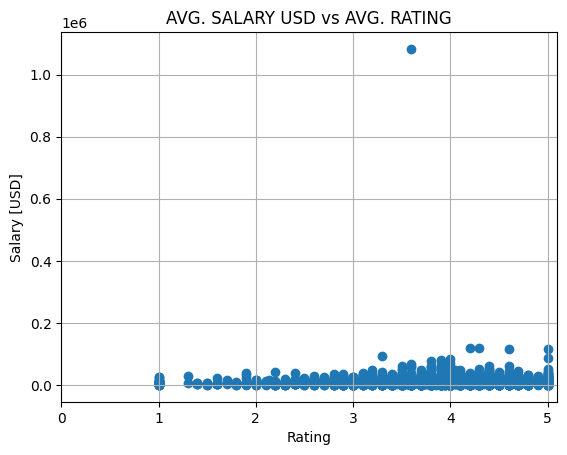

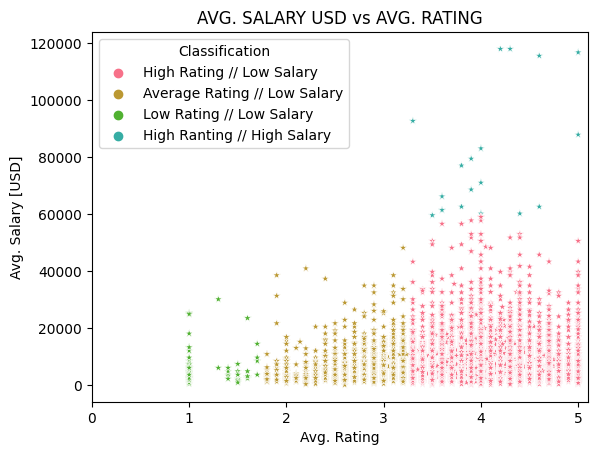

In [12]:
#Import all the libraries needed to plot the data
import seaborn as sns
import matplotlib.pyplot as plt

# In this figure we see the oddity
plt.figure(0)
plt.scatter(sps_mean_salary_USD["Rating"],sps_mean_salary_USD["Salary_USD"])
plt.title("AVG. SALARY USD vs AVG. RATING")
plt.grid(axis="both")
plt.xlabel("Rating")
plt.ylabel("Salary [USD]")
plt.xlim(0,5.1)

# By observing the scatter plot we can see that the oddity is related with some Company which average salary is much more higher then the remaining
print("R: The company which is causing this oddity is " + str(sps_mean_salary_USD[sps_mean_salary_USD["Salary_USD"]==max(sps_mean_salary_USD["Salary_USD"])]["Company Name"].item()))



#### FROM HERE : It is just a analysis I perform to see the data and divide by clusters, after excluding the "odd" value ####
# From here, I just clean that odd value and create a new scatter to observed the data classified according the rating/Salary USD
sps_plt=sps_mean_salary_USD[["Rating","Salary_USD"]].copy()
sps_plt=sps_plt[sps_plt["Salary_USD"]<max(sps_plt["Salary_USD"])]

# Create new columns with auxiliar values to help creating a classification of companies for according the relation between the average salary and the the average rating.
sps_plt["Salary-Rate"]= sps_plt["Salary_USD"]/max(sps_plt["Salary_USD"])
sps_plt["Rating-Rate"]= sps_plt["Rating"]/max(sps_plt["Rating"])

# Function used to classify the data and have a clear visualization of the scatter plot
def classify(row):
  
    if (row['Rating-Rate'] <= 0.35) & (row['Salary-Rate'] <= 0.50):
        val = "Low Rating // Low Salary"
    elif ((row['Rating-Rate'] > 0.35) & (row['Rating-Rate'] <= 0.65)) & (row['Salary-Rate'] <= 0.50):
        val = "Average Rating // Low Salary"
    elif (row['Rating-Rate'] > 0.65) & (row['Salary-Rate'] <= 0.50):
        val = "High Rating // Low Salary"
    elif (row['Rating-Rate'] <= 0.35)  & (row['Salary-Rate'] > 0.50):
        val = "Low Rating // High Salary"
    elif (row['Rating-Rate'] > 0.35) & (row['Rating-Rate'] <= 0.65) & (row['Salary-Rate'] > 0.50):
        val = "Average Rating // High Salary"
    else:
        val = "High Ranting // High Salary"
    return val

sps_plt["Classification"]=sps_plt.apply(classify, axis=1)

plt.figure(1)
sns.scatterplot(x='Rating', y='Salary_USD', hue="Classification", palette=sns.color_palette("husl", 6), marker='*', data=sps_plt).set(title="AVG. SALARY USD vs AVG. RATING",xlim=(0,5.1),xlabel="Avg. Rating",ylabel="Avg. Salary [USD]")
